In [21]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from polygon import RESTClient
import yfinance as yf

In [22]:
#Set start date variable as start date for historical data (9/20/23)
start_date = dt.datetime(2023, 9, 20)
#Set end date variable as end date for historical data (9/20/24)
end_date = dt.datetime(2024, 9, 19)

In [23]:
#List of tickers for stocks to be compared (Auto Makers):
symbols = ['TSLA', 'BMWKY', 'FUJHY', 'DRPRY', 'HMC', 'KS', 'MZDAY', 'TM', 'HYMTF']

#List of tickers for stocks to be compared (EV Charging Companies):
symbols.extend(['CHPT', 'EVGO', 'BLNK', 'WBX', 'SPWRQ'])

In [66]:
#Download data from Yahoo Finance using Yahoo Finance API, storing them in frames for better categorization
#Data preprocessing for all stock dataframes to make it easier to view/utilize for correlation calculations
frames = []
for stock in symbols:
    stock_curr = yf.download(tickers=stock, start=start_date, end=end_date)
    stock_curr.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis = 1, inplace = True)
    frames.append(stock_curr)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
#Merge all stock frames along the first axis to prep data for correlation heat matrix
stocks_df = pd.concat(frames, axis = 1, keys = symbols)
display(stocks_df.head(5))

,TSLA,BMWKY,FUJHY,DRPRY,HMC,KS,MZDAY,TM,HYMTF,CHPT,EVGO,BLNK,WBX,SPWRQ
,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,,,,,
2023-09-20,262.589996,33.342468,10.16,9.687654,35.519745,0.035,6.08,188.750000,37.490711,5.18,3.80,3.49,2.47,6.84
2023-09-21,255.699997,33.106934,9.97,9.542340,34.644779,0.035,5.97,186.300003,36.035679,5.09,3.65,3.14,2.27,6.62
2023-09-22,244.880005,33.012718,10.02,9.484214,34.634945,0.030,6.05,187.100006,36.035679,5.02,3.59,3.14,2.17,6.37
2023-09-25,246.990005,32.532223,9.88,9.522964,34.615284,0.035,6.00,184.839996,37.471813,4.92,3.52,2.95,2.34,6.10
2023-09-26,244.119995,31.900990,9.81,9.183896,34.143391,0.030,5.96,180.500000,37.018299,4.85,3.32,2.93,2.33,6.08


In [69]:
# Create a correlation matrix using panda's corr() method with the Pearson correlation method    
correlation_matrix = stocks_df.corr(method='pearson')
display(correlation_matrix.head(5))

correlation_matrix.columns


,,TSLA,BMWKY,FUJHY,DRPRY,HMC,KS,MZDAY,TM,HYMTF,CHPT,EVGO,BLNK,WBX,SPWRQ
,,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
TSLA,Adj Close,1.000000,-0.382276,-0.617797,-0.105639,-0.542369,-0.312699,-0.183333,-0.703099,-0.450905,0.576836,0.671817,0.262464,0.529305,0.340181
BMWKY,Adj Close,-0.382276,1.000000,0.694368,0.631267,0.681120,0.661476,0.711786,0.789533,0.002267,-0.081915,-0.497246,0.395138,0.098996,0.303075
FUJHY,Adj Close,-0.617797,0.694368,1.000000,0.275337,0.802309,0.369403,0.485540,0.905871,0.431673,-0.285234,-0.624325,0.153154,-0.238057,-0.034350
DRPRY,Adj Close,-0.105639,0.631267,0.275337,1.000000,0.588564,0.465526,0.693794,0.414097,-0.429766,0.376783,-0.385489,0.326005,0.384705,0.567421
HMC,Adj Close,-0.542369,0.681120,0.802309,0.588564,1.000000,0.270014,0.588994,0.842074,0.228785,-0.007980,-0.476078,0.015999,0.004387,0.066425


MultiIndex([( 'TSLA', 'Adj Close'),
            ('BMWKY', 'Adj Close'),
            ('FUJHY', 'Adj Close'),
            ('DRPRY', 'Adj Close'),
            (  'HMC', 'Adj Close'),
            (   'KS', 'Adj Close'),
            ('MZDAY', 'Adj Close'),
            (   'TM', 'Adj Close'),
            ('HYMTF', 'Adj Close'),
            ( 'CHPT', 'Adj Close'),
            ( 'EVGO', 'Adj Close'),
            ( 'BLNK', 'Adj Close'),
            (  'WBX', 'Adj Close'),
            ('SPWRQ', 'Adj Close')],
           )

<Axes: xlabel='None-None', ylabel='None-None'>

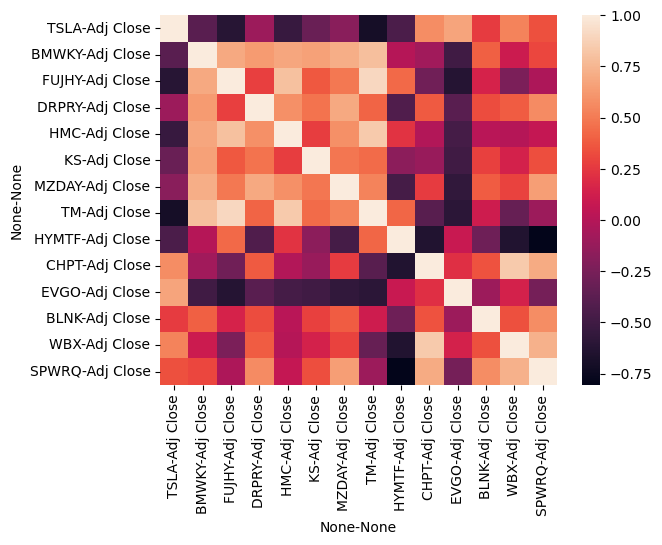

In [27]:
display(sns.heatmap(stocks_df.corr(method='pearson')))

In [41]:
# Iterate through the columns and replace the diagonal values (correlation = 1) with 0 in order to get the actual max correlation values
np.fill_diagonal(correlation_matrix.values, 0)

display(correlation_matrix.head(12))

,,TSLA,BMWKY,FUJHY,DRPRY,HMC,KS,MZDAY,TM,HYMTF,CHPT,EVGO,BLNK,WBX,SPWRQ
,,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
TSLA,Adj Close,0.000000,-0.382276,-0.617797,-0.105639,-0.542369,-0.312699,-0.183333,-0.703099,-0.450905,0.576836,0.671817,0.262464,0.529305,0.340181
BMWKY,Adj Close,-0.382276,0.000000,0.694368,0.631267,0.681120,0.661476,0.711786,0.789533,0.002267,-0.081915,-0.497246,0.395138,0.098996,0.303075
FUJHY,Adj Close,-0.617797,0.694368,0.000000,0.275337,0.802309,0.369403,0.485540,0.905871,0.431673,-0.285234,-0.624325,0.153154,-0.238057,-0.034350
DRPRY,Adj Close,-0.105639,0.631267,0.275337,0.000000,0.588564,0.465526,0.693794,0.414097,-0.429766,0.376783,-0.385489,0.326005,0.384705,0.567421
HMC,Adj Close,-0.542369,0.681120,0.802309,0.588564,0.000000,0.270014,0.588994,0.842074,0.228785,-0.007980,-0.476078,0.015999,0.004387,0.066425
KS,Adj Close,-0.312699,0.661476,0.369403,0.465526,0.270014,0.000000,0.481994,0.438802,-0.166198,-0.114233,-0.500700,0.287046,0.144933,0.333755
MZDAY,Adj Close,-0.183333,0.711786,0.485540,0.693794,0.588994,0.481994,0.000000,0.529647,-0.480193,0.260475,-0.566076,0.385221,0.294207,0.642169
TM,Adj Close,-0.703099,0.789533,0.905871,0.414097,0.842074,0.438802,0.529647,0.000000,0.415741,-0.394177,-0.597609,0.111323,-0.330045,-0.099801
HYMTF,Adj Close,-0.450905,0.002267,0.431673,-0.429766,0.228785,-0.166198,-0.480193,0.415741,0.000000,-0.644952,0.087412,-0.291050,-0.648529,-0.804478


In [50]:
# Get the max correlation values of each column using a dictionary to track them

#max_corr = {}


max_vals = correlation_matrix.max()
print(len(max_vals))
print(max_vals.iloc[0])
max_vals_position = correlation_matrix.idxmax()
print(max_vals_position.iloc[0])
#print("Current max correlation values and position of each column:\n")
#print(f"{max_vals} {max_val_position}")

14
0.6718173539534298
('EVGO', 'Adj Close')
